# **Задание №5. Формирование календарного плана проекта и управление рисками**



## **Тема дипломного проекта: "Разработка мобильного приложения классификации болезней кожи по фото"**



### **1. Календарный план проекта (диаграмма Ганта)**



#### **Функция Python для построения диаграммы Ганта:**

In [1]:
def create_gantt_chart(tasks, title="Диаграмма Ганта", save_path="gantt_chart.png", figsize=(16, 8)):
    """
    Создает и сохраняет диаграмму Ганта в виде таблицы на основе предоставленных данных о задачах.

    Параметры:
    ----------
    tasks : list of dict
        Список словарей, каждый из которых содержит информацию о задаче в формате:
        {"Task": "Название задачи", "Start": "YYYY-MM-DD", "End": "YYYY-MM-DD", "Group": "Группа задачи"}
    title : str, optional
        Заголовок диаграммы
    save_path : str, optional
        Путь для сохранения изображения
    figsize : tuple, optional
        Размер изображения (ширина, высота) в дюймах

    Возвращает:
    -----------
    None (сохраняет изображение и отображает его)
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from datetime import datetime, timedelta

    # Создание DataFrame и преобразование дат
    df = pd.DataFrame(tasks)
    df['Start'] = pd.to_datetime(df['Start'])
    df['End'] = pd.to_datetime(df['End'])

    # Определение временного диапазона проекта
    project_start = df['Start'].min().date()
    project_end = df['End'].max().date()
    project_duration = (project_end - project_start).days + 1

    # Создание всех дат проекта
    all_dates = [project_start + timedelta(days=i) for i in range(project_duration)]
    date_labels = [date.strftime('%d-%m') for date in all_dates]

    # Создание длинного формата данных для heatmap
    gantt_data = []
    for i, task in enumerate(df.itertuples()):
        task_start = task.Start.date()
        task_end = task.End.date()
        for date in all_dates:
            is_active = 1 if task_start <= date <= task_end else 0
            gantt_data.append({
                'Task': task.Task,
                'Date': date.strftime('%Y-%m-%d'),
                'Active': is_active,
                'Group': task.Group
            })

    # Преобразование в DataFrame
    gantt_df = pd.DataFrame(gantt_data)

    # Преобразование в матричный формат для heatmap
    gantt_matrix = gantt_df.pivot(index='Task', columns='Date', values='Active')

    # Получение уникальных групп задач
    groups = df['Group'].unique()

    # Создание цветовой схемы для групп
    group_values = {group: i+1 for i, group in enumerate(groups)}

    # Создание матрицы с группами
    group_matrix = np.zeros_like(gantt_matrix.values)
    for i, task in enumerate(gantt_matrix.index):
        group = df[df['Task'] == task]['Group'].values[0]
        group_value = group_values[group]
        active_indices = np.where(gantt_matrix.iloc[i, :] == 1)
        group_matrix[i, active_indices] = group_value

    # Настройка цветовой схемы - исправлено для устранения deprecation warning
    num_colors = len(group_values) + 1
    cmap = plt.colormaps['Paired']  # Используем plt.colormaps вместо plt.cm.get_cmap
    colors = [cmap(i/(num_colors-1)) for i in range(num_colors)]
    custom_cmap = plt.matplotlib.colors.ListedColormap(['white'] + colors[1:])

    # Создание фигуры с дополнительным пространством для легенды
    fig, ax = plt.subplots(figsize=figsize)

    # Создание heatmap с seaborn
    ax = sns.heatmap(group_matrix, cmap=custom_cmap, cbar=False,
                    linewidths=.5, linecolor='gray',
                    xticklabels=date_labels, yticklabels=gantt_matrix.index, ax=ax)

    # Настройка осей
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Дата', fontsize=12)
    ax.set_ylabel('Задача', fontsize=12)

    # Настройка частоты меток по оси X (каждые 7 дней)
    tick_positions = np.arange(0, project_duration, 7)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels([all_dates[pos].strftime('%d-%m-%Y') for pos in tick_positions], rotation=45)

    # Добавление сетки для недель
    for week_pos in tick_positions:
        plt.axvline(x=week_pos, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

    # Добавление легенды вне области графика
    legend_elements = [plt.Rectangle((0, 0), 1, 1, facecolor=colors[group_values[group]],
                                    edgecolor='gray', label=group)
                      for group in group_values.keys()]

    # Размещаем легенду вне области графика (справа от диаграммы)
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.02, 0.5),
             fontsize=10, frameon=True, fancybox=True, shadow=True)

    # Оптимизация размещения
    plt.tight_layout()

    # Сохранение с высоким разрешением
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

#### **Пример диаграммы Гантта:**

При выполнении данного кода будет создана диаграмма Ганта, отображающая все задачи проекта с цветовым кодированием по группам задач и указанием дат начала и окончания.


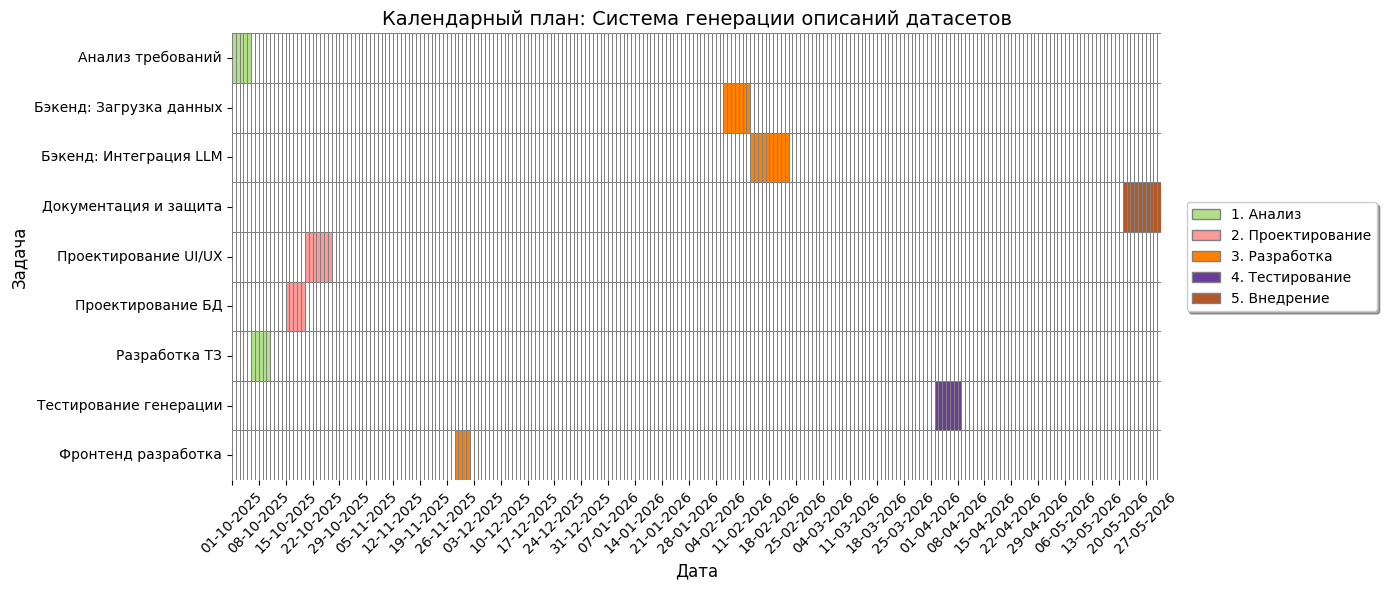

In [3]:
# Cписок задач для проекта системы генерации описаний датасетов
sample_tasks = [
    {"Task": "Анализ требований", "Start": "2025-10-01", "End": "2025-10-05", "Group": "1. Анализ"},
    {"Task": "Разработка ТЗ", "Start": "2025-10-06", "End": "2025-10-10", "Group": "1. Анализ"},

    {"Task": "Проектирование БД", "Start": "2025-10-15", "End": "2025-10-19", "Group": "2. Проектирование"},
    {"Task": "Проектирование UI/UX", "Start": "2025-10-20", "End": "2025-10-26", "Group": "2. Проектирование"},

    {"Task": "Фронтенд разработка", "Start": "2025-11-28", "End": "2025-12-01", "Group": "3. Разработка"},
    {"Task": "Бэкенд: Загрузка данных", "Start": "2026-02-06", "End": "2026-02-12", "Group": "3. Разработка"},
    {"Task": "Бэкенд: Интеграция LLM", "Start": "2026-02-13", "End": "2026-02-22", "Group": "3. Разработка"},

    {"Task": "Тестирование генерации", "Start": "2026-04-02", "End": "2026-04-08", "Group": "4. Тестирование"},

    {"Task": "Документация и защита", "Start": "2026-05-21", "End": "2026-05-30", "Group": "5. Внедрение"}
]

# Вызов функции для создания диаграммы Ганта
create_gantt_chart(
    tasks=sample_tasks,
    title="Календарный план: Система генерации описаний датасетов",
    save_path="dataset_system_gantt.png",
    figsize=(14, 6)
)


## 2. Анализ и управление рисками проекта

**Таблица анализа рисков:**

| ID | Риск | Вероятность | Влияние | Рейтинг | Стратегия реагирования | Превентивные меры |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **R1** | **Низкое качество (галлюцинации) генерации LLM** | Высокая | Высокое | **Критический** | Снижение | • Использование Few-shot prompting (примеры в запросе)<br>• Валидация JSON-вывода модели<br>• Реализация механизма ручного редактирования (Human-in-the-loop) |
| **R2** | **Ошибки при парсинге сложных форматов датасетов** | Средняя | Среднее | **Средний** | Снижение | • Строгая валидация структуры файлов при загрузке<br>• Поддержка только UTF-8 кодировок<br>• Ограничение на размер загружаемого файла |
| **R3** | **Превышение лимитов API или стоимости токенов** | Средняя | Высокое | **Высокий** | Снижение | • Кэширование запросов (не генерировать описание повторно для одного хэша файла)<br>• Использование более дешевых моделей для черновиков<br>• Мониторинг затрат в реальном времени |
| **R4** | **Сложности интеграции Frontend с потоковым API** | Средняя | Среднее | **Средний** | Снижение | • Использование WebSocket или Server-Sent Events (SSE)<br>• Четкая спецификация API (Swagger/OpenAPI) до начала разработки |
| **R5** | **Утечка чувствительных данных через LLM** | Низкая | Высокое | **Высокий** | Избежание | • Анонимизация данных перед отправкой (удаление PII)<br>• Использование локальных моделей (если позволяют ресурсы)<br>• Предупреждение пользователей о передаче данных третьим лицам |

---

## 3. Контрольные точки проекта

| № | Веха | Дата | Критерии достижения |
| :--- | :--- | :--- | :--- |
| **1** | **Утверждение концепции и ТЗ** | **10.10.2025** | • Завершен анализ требований<br>• Согласованы форматы входных данных<br>• ТЗ разработано и подписано |
| **2** | **Готовность архитектуры и UI** | **26.10.2025** | • Спроектирована БД и интерфейсы<br>• Выбран стек технологий<br>• Прототипы экранов утверждены |
| **3** | **MVP Системы (Backend + LLM)** | **22.02.2026** | • Реализована серверная часть загрузки данных<br>• Завершена интеграция с LLM<br>• Бэкенд возвращает сгенерированные описания |
| **4** | **Полная интеграция системы** | **01.04.2026** | • Фронтенд (разработанный ранее) интегрирован с Бэкендом<br>• Система собрана в единый билд<br>• Готовность к началу комплексного тестирования (назначено на 02.04) |
| **5** | **Готовность к защите** | **30.05.2026** | • Пройдено тестирование<br>• Оформлена вся проектная документация<br>• Дипломный проект готов к сдаче |


---

## 4. Пояснительная записка

**Обоснование принятых решений**

В данном календарном плане разработка системы автоматической генерации описаний датасетов разделена на 5 классических этапов жизненного цикла ПО: анализ, проектирование, разработка, тестирование и внедрение. Однако структура плана адаптирована под специфику работы с генеративным искусственным интеллектом (GenAI).

Ключевой особенностью планирования является выделение **наибольшего временного слота (10 дней) на задачу "Интеграция с LLM и генерация"**. Это обусловлено тем, что настройка промптов (Prompt Engineering) и обработка вариативных ответов языковой модели — наиболее непредсказуемая часть проекта, требующая итеративного подхода и тонкой настройки. Параллельно с разработкой бэкенда запланировано создание фронтенда, что позволяет сократить общий срок реализации проекта.

В анализе рисков наивысший приоритет отдан проблемам качества генерации (**R1**) и зависимости от внешних API (**R3**). Для минимизации этих рисков в архитектуру системы заложена возможность ручного редактирования описаний пользователем ("Human-in-the-loop"), что делает систему надежной даже при несовершенстве работы ИИ. Также предусмотрено кэширование результатов для оптимизации расходов токенов.

Критический путь проекта проходит через задачи проектирования базы данных и интеграции с LLM, так как без корректной модели данных невозможно начать разработку, а без стабильной работы модуля генерации проект теряет свою основную функциональную ценность.
